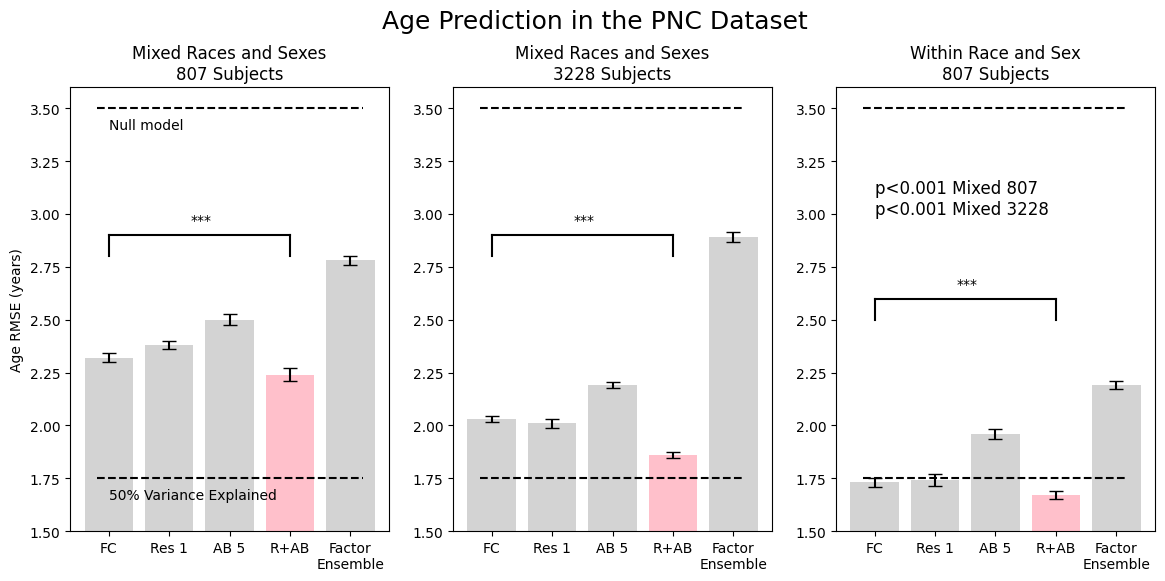

In [12]:
# PNC Age prediction on groups with angle basis

import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

tick_labels = ['FC','Res 1','AB 5','R+AB','Factor\nEnsemble']
color='lightgray'
dashcolor = 'black'

fig, ax = plt.subplots(1,3,figsize=(14,6))
ax[0].bar([0,1,2,3,4],[2.32,2.38,2.5,2.24,2.78],
          tick_label=tick_labels,yerr=np.array([0.1,0.09,0.12,0.14,0.09])/sqrt(20),
          color=[color,color,color,'pink',color],
          capsize=5)
ax[0].plot([-0.2,4.2],[3.5,3.5],linestyle='--',color='black')
ax[0].plot([-0.2,4.2],[1.75,1.75],linestyle='--',color=dashcolor)
ax[0].set_title('Mixed Races and Sexes\n807 Subjects')
ax[0].set_ylim([1.5,3.6])
ax[0].text(0,3.4,'Null model')
ax[0].text(0,1.65,'50% Variance Explained')

ax[1].bar([0,1,2,3,4],[2.03,2.01,2.19,1.86,2.89],
          tick_label=tick_labels,yerr=np.array([0.06,0.09,0.06,0.06,0.1])/sqrt(20),
          color=[color,color,color,'pink',color],
          capsize=5)
ax[1].plot([-0.2,4.2],[3.5,3.5],linestyle='--',color='black')
ax[1].plot([-0.2,4.2],[1.75,1.75],linestyle='--',color=dashcolor)
ax[1].set_title('Mixed Races and Sexes\n3228 Subjects')
ax[1].set_ylim([1.5,3.6])

ax[2].bar([0,1,2,3,4],[1.73,1.74,1.96,1.67,2.19],
          tick_label=tick_labels,yerr=np.array([0.1,0.13,0.1,0.08,0.09])/sqrt(20),color=[color,color,color,'pink'],
          capsize=5)
ax[2].plot([-0.2,4.2],[3.5,3.5],linestyle='--',color='black')
ax[2].plot([-0.2,4.2],[1.75,1.75],linestyle='--',color=dashcolor)
ax[2].set_title('Within Race and Sex\n807 Subjects')
ax[2].set_ylim([1.5,3.6])

# ax[0].text(1.5,3.2,'p<0.001',fontsize=12)
# ax[1].text(1.5,3.2,'p<0.001',fontsize=12)

# ax[0].text(1.85,3,'***')
ax[0].text(1.35,2.95,'***')
# ax[0].plot([0,4],[2.95,2.95],color='black')
ax[0].plot([0,3],[2.9,2.9],color='black')
ax[0].plot([0,0],[2.8,2.9],color='black')
ax[0].plot([3,3],[2.8,2.9],color='black')
# ax[0].plot([4,4],[2.8,2.95],color='black')

# ax[1].text(1.85,3,'***')
ax[1].text(1.35,2.95,'***')
# ax[1].plot([0,4],[2.95,2.95],color='black')
ax[1].plot([0,3],[2.9,2.9],color='black')
ax[1].plot([0,0],[2.8,2.9],color='black')
ax[1].plot([3,3],[2.8,2.9],color='black')
# ax[1].plot([4,4],[2.8,2.95],color='black')

ax[2].text(1.35,2.65,'***')
ax[2].plot([0,3],[2.6,2.6],color='black')
ax[2].plot([0,0],[2.5,2.6],color='black')
ax[2].plot([3,3],[2.5,2.6],color='black')

ax[0].set_ylabel('Age RMSE (years)')

ax[2].text(0,3,'p<0.001 Mixed 807\np<0.001 Mixed 3228',fontsize=12)

fig.suptitle('Age Prediction in the PNC Dataset',fontsize=18)
fig.subplots_adjust(top=0.85)
fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/AngleBasis/GroupsAgeResults.pdf')


In [1]:
# Make Angle Basis figures

import pickle
import re
import numpy as np

basis_file = '/home/anton/Documents/Tulane/Research/PNC_Good/AngleBasis1.pkl'
demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/PNC/'

basis = pickle.load(open(basis_file, 'rb'))

thetas = []
jitter = []
age = []
fc = []

demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))

for subtask in basis:
    m = re.search('([^-]+)-(.*)', subtask)
#     m = re.search('([^-]+)', subtask)
    sub = m.group(1)
    task = m.group(2)
    a = demo['age_at_cnb'][sub]
    age.append(a)
    thetas.append(basis[subtask]['thetas'])
    jitter.append(basis[subtask]['jitter'])
    p = np.load(f'{demodir}/fc/{sub}_task-{task}_fc.npy')
    fc.append(p)
    
thetas = np.stack(thetas)
jitter = np.stack(jitter)
age = np.array(age)
fc = np.stack(fc)

print([a.shape for a in [thetas, jitter, age, fc]])
print(np.mean(age))

[(3849, 1, 264), (3849, 1, 264), (3849,), (3849, 34716)]
14.398285268901013


In [8]:
def rmse(yhat, y):
    if isinstance(yhat, np.ndarray) or isinstance(yhat, int):
        f = np.mean
    else:
        f = torch.mean
    return f((y-yhat)**2)**0.5

def tops(thetas, jitter):
    t0 = np.expand_dims(thetas, 2)
    t1 = np.expand_dims(thetas, 3)
    j0 = np.expand_dims(jitter, 2)
    j1 = np.expand_dims(jitter, 3)
    ps = np.cos(t0-t1)*(j0*j1)
    a,b = np.triu_indices(264, 1)
    ps = ps[:,:,a,b]
    return ps,np.cos(t0-t1),(j0*j1)
    
ps,cs,jit = tops(thetas, jitter)
aps = np.mean(ps, axis=1)
res = fc - aps

print(ps.shape)
print(aps.shape)
print(res.shape)

(3849, 1, 34716)
(3849, 34716)
(3849, 34716)


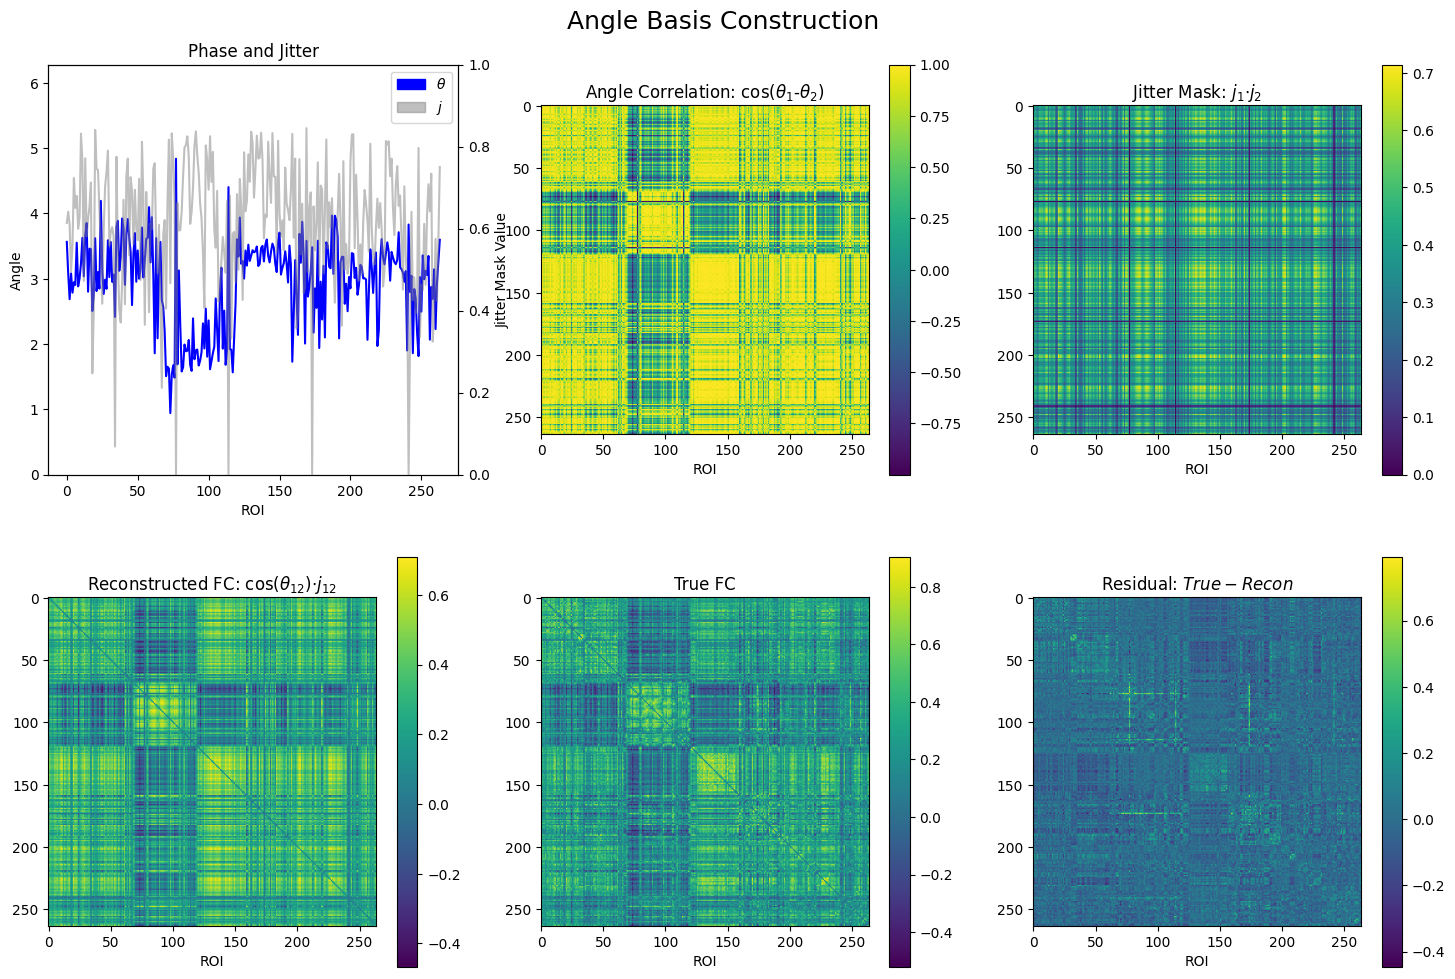

In [81]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(2,3,figsize=(18,11))

ax[0,0].plot(remapvec(thetas[8,0]),color='blue')
ax[0,0].set_ylim([0,6.28])
axjit = ax[0,0].twinx()
axjit.plot(remapvec(jitter[8,0]),color='grey',alpha=0.5)
axjit.set_ylim([0,1])

blue_patch = mpatches.Patch(color='blue', label=r'$\theta$')
red_patch = mpatches.Patch(color='grey', alpha=0.5, label=r'$j$')

ax[0,0].legend(handles=[blue_patch,red_patch])
ax[0,0].set_ylabel('Angle')
ax[0,0].set_xlabel('ROI')
axjit.set_ylabel('Jitter Mask Value')
ax[0,0].set_title('Phase and Jitter')

im = ax[0,1].imshow(remap(cs[8,0]))
ax[0,1].set_title(r'Angle Correlation: cos($\theta_1$-$\theta_2$)')
ax[0,1].set_xlabel('ROI')
fig.colorbar(im, ax=ax[0,1])

im = ax[0,2].imshow(remap(jit[8,0]))
ax[0,2].set_title(r'Jitter Mask: $j_1{\cdot}j_2$')
ax[0,2].set_xlabel('ROI')
fig.colorbar(im, ax=ax[0,2])

im = ax[1,0].imshow(remap(vec2mat(aps[8])))
ax[1,0].set_title(r'Reconstructed FC: cos($\theta_{12}$)$\cdot{j_{12}}$')
ax[1,0].set_xlabel('ROI')
fig.colorbar(im, ax=ax[1,0])

im = ax[1,1].imshow(remap(vec2mat(fc[8])))
ax[1,1].set_title('True FC')
ax[1,1].set_xlabel('ROI')
fig.colorbar(im, ax=ax[1,1])

im = ax[1,2].imshow(remap(vec2mat(res[8])))
ax[1,2].set_title(r'Residual: $True-Recon$')
ax[1,2].set_xlabel('ROI')
fig.colorbar(im, ax=ax[1,2])

fig.suptitle('Angle Basis Construction',fontsize=18)
fig.subplots_adjust(top=0.93)
fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/AngleBasis/AngleBasis1OneSubject.pdf')

In [7]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

def remapvec(v, roimap=ours2orig):
    return v[roimap]

print('Complete')

Complete
